___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to the "***Sentiment Analysis and Classification Project***" project, the first and only project of the ***Natural Language Processing (NLP)*** course.

This analysis will focus on using Natural Language techniques to find broad trends in the written thoughts of the customers.
The goal in this project is to predict whether customers recommend the product they purchased using the information in their review text.

One of the challenges in this project is to extract useful information from the *Review Text* variable using text mining techniques. The other challenge is that you need to convert text files into numeric feature vectors to run machine learning algorithms.

At the end of this project, you will learn how to build sentiment classification models using Machine Learning algorithms (***Logistic Regression, Naive Bayes, Support Vector Machine, Random Forest*** and ***Ada Boosting***), **Deep Learning algorithms** and **BERT algorithm**.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with the theory behind the algorithms mentioned above as well as NLP techniques.*



---
---


# #Determines
The data is a collection of 22641 Rows and 10 column variables. Each row includes a written comment as well as additional customer information.
Also each row corresponds to a customer review, and includes the variables:


**Feature Information:**

**Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.

**Age:** Positive Integer variable of the reviewers age.

**Title:** String variable for the title of the review.

**Review Text:** String variable for the review body.

**Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.

**Division Name:** Categorical name of the product high level division.

**Department Name:** Categorical name of the product department name.

**Class Name:** Categorical name of the product class name.

---

The basic goal in this project is to predict whether customers recommend the product they purchased using the information in their *Review Text*.
Especially, it should be noted that the expectation in this project is to use only the "Review Text" variable and neglect the other ones.
Of course, if you want, you can work on other variables individually.

Project Structure is separated in five tasks: ***EDA, Feature Selection and Data Cleaning , Text Mining, Word Cloud*** and ***Sentiment Classification with Machine Learning, Deep Learning and BERT model***.

Classically, you can start to know the data after doing the import and load operations.
You need to do missing value detection for Review Text, which is the only variable you need to care about. You can drop other variables.

You will need to apply ***noise removal*** and ***lexicon normalization*** processes by using the capabilities of the ***nltk*** library to the data set that is ready for text mining.

Afterwards, you will implement ***Word Cloud*** as a visual analysis of word repetition.

Finally, You will build models with five different algorithms and compare their performance. Thus, you will determine the algorithm that makes the most accurate emotion estimation by using the information obtained from the * Review Text * variable.






---
---


# #Tasks

#### 1. Exploratory Data Analysis

- Import Modules, Load Discover the Data

#### 2. Feature Selection and Data Cleaning

- Feature Selection and Rename Column Name
- Missing Value Detection

#### 3. Text Mining

- Tokenization
- Noise Removal
- Lexicon Normalization

#### 4. WordCloud - Repetition of Words

- Detect Reviews
- Collect Words
- Create Word Cloud


#### 5. Sentiment Classification with Machine Learning, Deep Learning and BERT Model

- Train - Test Split
- Vectorization
- TF-IDF
- Logistic Regression
- Naive Bayes
- Support Vector Machine
- Random Forest
- AdaBoost
- Deep Learning Model
- BERT Model
- Model Comparison

---
---


# Sentiment analysis of women's clothes reviews


In this project we used sentiment analysis to determined whether the product is recommended or not. We used different machine learning algorithms to get more accurate predictions. The following classification algorithms have been used: ML algorithms(Logistic Regression, Naive Bayes, Support Vector Machine (SVM), Random Forest and Ada Boosting), Deep learning algorithm and BERT algorithm. The dataset comes from Woman Clothing Review that can be find at (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews.


## 1. Exploratory Data Analysis

### Import Libraries, Load and Discover the Data

In [2]:
import tensorflow as tf
import os

resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://'+ os.environ['COLAB_TPU_ADDR'])

tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)
print("All devices: ", tf.config.list_logical_devices('TPU'))

All devices:  [LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:0', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:1', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:2', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:3', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:4', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:5', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:6', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:7', device_type='TPU')]


In [3]:
strategy = tf.distribute.TPUStrategy(resolver)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [8]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df = pd.read_csv("/content/drive/MyDrive/Colab_Files/Womens Clothing E-Commerce Reviews.csv")
df.head()

Unnamed: 0  Clothing ID  Age                    Title  \
0           0          767   33                      NaN   
1           1         1080   34                      NaN   
2           2         1077   60  Some major design flaws   
3           3         1049   50         My favorite buy!   
4           4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0       Initmates        Intimate  Intimates  
1                        4         General         Dresses    Dresses  
2                        0         General         Dresses    Dresses  
3                        0  General Petite         Bottoms      Pants  
4                        6         General            Tops    Blouses

### Data Wrangling

In [9]:
df.drop(columns=["Unnamed: 0"], axis=1, inplace =True)

In [10]:
df.shape

(23486, 10)

In [11]:
df.isnull().sum()

Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [12]:
df.duplicated().sum()

21

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.shape

(23465, 10)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23465 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23465 non-null  int64 
 1   Age                      23465 non-null  int64 
 2   Title                    19676 non-null  object
 3   Review Text              22640 non-null  object
 4   Rating                   23465 non-null  int64 
 5   Recommended IND          23465 non-null  int64 
 6   Positive Feedback Count  23465 non-null  int64 
 7   Division Name            23451 non-null  object
 8   Department Name          23451 non-null  object
 9   Class Name               23451 non-null  object
dtypes: int64(5), object(5)
memory usage: 2.0+ MB


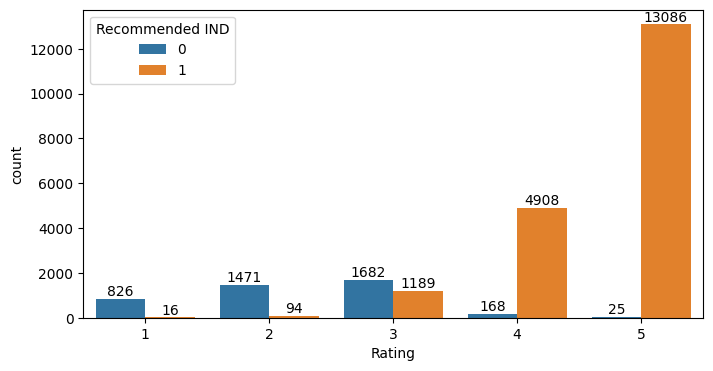

In [18]:
plt.figure(figsize = (8,4))
ax = sns.countplot(x="Rating", data=df, hue="Recommended IND")
for p in ax.containers:
  ax.bar_label(p)

#### Check Proportion of Target Class Variable:

The target class variable is imbalanced, where "Recommended" values are more dominating then "Not Recommendation".

In [19]:
df["Recommended IND"].value_counts()

1    19293
0     4172
Name: Recommended IND, dtype: int64

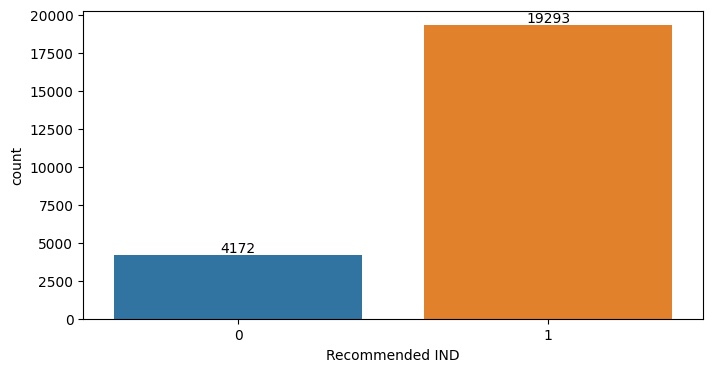

In [21]:
plt.figure(figsize = (8,4))
ax = sns.countplot(x="Recommended IND", data=df)
ax.bar_label(ax.containers[0]);

## 2. Feature Selection and Data Cleaning

From now on, the DataFrame you will work with should contain two columns: **"Review Text"** and **"Recommended IND"**. You can do the missing value detection operations from now on. You can also rename the column names if you want.



### Feature Selection and Rename Column Name

In [22]:
df.rename(columns={"Review Text":"review","Recommended IND":"label"}, inplace=True)

In [23]:
df.head()

Clothing ID  Age                    Title  \
0          767   33                      NaN   
1         1080   34                      NaN   
2         1077   60  Some major design flaws   
3         1049   50         My favorite buy!   
4          847   47         Flattering shirt   

                                              review  Rating  label  \
0  Absolutely wonderful - silky and sexy and comf...       4      1   
1  Love this dress!  it's sooo pretty.  i happene...       5      1   
2  I had such high hopes for this dress and reall...       3      0   
3  I love, love, love this jumpsuit. it's fun, fl...       5      1   
4  This shirt is very flattering to all due to th...       5      1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0       Initmates        Intimate  Intimates  
1                        4         General         Dresses    Dresses  
2                        0         General         Dresses    Dresses  
3                        0  General Petite         Bottoms      Pants  
4                        6         General            Tops    Blouses

For sentiment analysis we will need only review and the label columns.

In [25]:
df = df[["review", "label"]]
df.head()

review  label
0  Absolutely wonderful - silky and sexy and comf...      1
1  Love this dress!  it's sooo pretty.  i happene...      1
2  I had such high hopes for this dress and reall...      0
3  I love, love, love this jumpsuit. it's fun, fl...      1
4  This shirt is very flattering to all due to th...      1

### Missing Value Detection

In [26]:
df.isnull().sum()

review    825
label       0
dtype: int64

In [27]:
df.dropna(inplace=True)

In [30]:
df.reset_index(drop=True, inplace=True)

In [31]:
df

review  label
0      Absolutely wonderful - silky and sexy and comf...      1
1      Love this dress!  it's sooo pretty.  i happene...      1
2      I had such high hopes for this dress and reall...      0
3      I love, love, love this jumpsuit. it's fun, fl...      1
4      This shirt is very flattering to all due to th...      1
...                                                  ...    ...
22635  I was very happy to snag this dress at such a ...      1
22636  It reminds me of maternity clothes. soft, stre...      1
22637  This fit well, but the top was very see throug...      0
22638  I bought this dress for a wedding i have this ...      1
22639  This dress in a lovely platinum is feminine an...      1

[22640 rows x 2 columns]

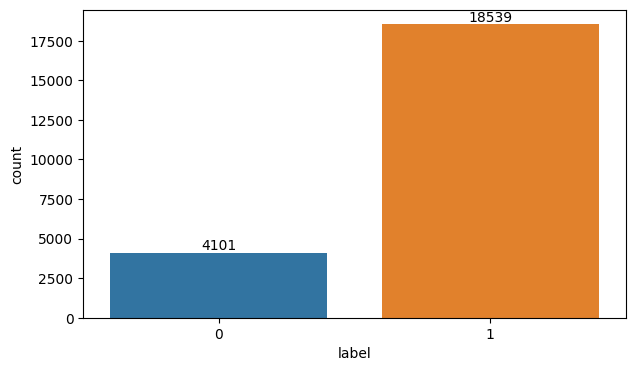

In [36]:
plt.figure(figsize = (7,4))
ax = sns.countplot(x="label", data=df)
ax.bar_label(ax.containers[0]);

## 3. Text Mining

Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text preprocessing**.

The three key steps of text preprocessing:

- **Tokenization:**
This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

- **Noise Removal:**
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.


- **Lexicon Normalization:**
Another type of textual noise is about the multiple representations exhibited by single word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma).
There are two methods of lexicon normalisation; **[Stemming or Lemmatization](https://www.guru99.com/stemming-lemmatization-python-nltk.html)**. Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word (rather than just stripping suffixes, which is stemming).

As the first step change text to tokens and convertion all of the words to lower case.  Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method.


***Note:*** *Use the functions of the ***[nltk Library](https://www.guru99.com/nltk-tutorial.html)*** for all the above operations.*



### Tokenization, Noise Removal, Lexicon Normalization

In [37]:
stop_words = stopwords.words('english')

for i in ["not", "no"]:
  stop_words.remove(i)

In [ ]:
stop_words

In [39]:
def cleaning(data):

    #1. Tokenize
    text_tokens = word_tokenize(data.replace("'","").lower())

    #2. Remove punctuation marks and special characters
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]

    #3. Remove stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]

    #4. Lemmatization
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]

    return " ".join(text_cleaned)

In [44]:
df["review"] = df["review"].apply(cleaning)

In [45]:
df.head()

review  label
0        absolutely wonderful silky sexy comfortable      1
1  love dress sooo pretty happened find store im ...      1
2  high hope dress really wanted work initially o...      0
3  love love love jumpsuit fun flirty fabulous ev...      1
4  shirt flattering due adjustable front tie perf...      1

## 4. WordCloud - Repetition of Words

Now you'll create a Word Clouds for reviews, representing most common words in each target class.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

You are expected to create separate word clouds for positive and negative reviews. You can qualify a review as positive or negative, by looking at its recommended status. You may need to use capabilities of matplotlib for visualizations.

You can follow the steps below:

- Detect Reviews
- Collect Words
- Create Word Cloud


### Detect Reviews (positive and negative separately)

In [59]:
positive_reviews = df[df.label==1]

In [60]:
positive_reviews

review  label
0            absolutely wonderful silky sexy comfortable      1
1      love dress sooo pretty happened find store im ...      1
3      love love love jumpsuit fun flirty fabulous ev...      1
4      shirt flattering due adjustable front tie perf...      1
6      aded basket hte last mintue see would look lik...      1
...                                                  ...    ...
22634  wasnt sure ordering skirt couldnt see person f...      1
22635  happy snag dress great price easy slip flatter...      1
22636  reminds maternity clothes soft stretchy shiny ...      1
22638  bought dress wedding summer cute unfortunately...      1
22639  dress lovely platinum feminine fit perfectly e...      1

[18539 rows x 2 columns]

In [61]:
negative_reviews = df[df.label==0]
negative_reviews

review  label
2      high hope dress really wanted work initially o...      0
5      love tracy reese dress one not petite foot tal...      0
10     dress run small esp zipper area run ordered sp...      0
22     first not pullover styling side zipper wouldnt...      0
25     loved material didnt really look long dress pu...      0
...                                                  ...    ...
22605  tried color really pretty fun donset want pair...      0
22606  wanted love jacket soft great color unfortunat...      0
22616  purchased good price typically love maeve fabr...      0
22633  surprised positive review product terrible cut...      0
22637  fit well top see never would worked im glad ab...      0

[4101 rows x 2 columns]

### Collect Words (positive and negative separately)

In [75]:
positive_words = " ".join(positive_reviews["review"])

In [72]:
positive_words

'absolutely wonderful silky sexy comfortable love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment shirt flattering due adjustable front tie perfect length wear legging sleeveless pair well cardigan love shirt aded basket hte last mintue see would look like person store pick went teh darkler color pale hte color really gorgeous turn mathced everythiing trying prefectly little baggy hte x hte msallet size bummer no petite decided jkeep though said matvehd everything ejans pant skirt waas trying kept oops ordered carbon store pick ton stuff always try used top pair skirt pant everything went color really nice charcoal shimmer went well pencil skirt flare pant etc compaint bit big sleeve long doesnt go petite also bit loose no xx kept wil ldecide later since light color alread

In [73]:
negative_words = " ".join(negative_reviews["review"])

In [74]:
negative_words

'high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could not zip reordered petite medium overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net layer sewn directly zipper c love tracy reese dress one not petite foot tall usually wear brand dress pretty package lot dress skirt long full overwhelmed small frame not stranger alteration shortening narrowing skirt would take away embellishment garment love color idea style not work returned dress dress run small esp zipper area run ordered sp typically fit tight material top look feel cheap even pulling cause rip fabric pretty disappointed going christmas dress year needle say going back first not pullover styling side zipper wouldnt purchased knew side zipper large bust side zipper next impossible second tulle feel look cheap slip awkward tight shape underneath not look like described sadly returning im sure fi

### Create Word Cloud (for most common words in recommended not recommended reviews separately)

In [76]:
from wordcloud import WordCloud

In [79]:
wordcloud_positive = WordCloud(background_color="black", max_words=len(positive_words),scale=3)

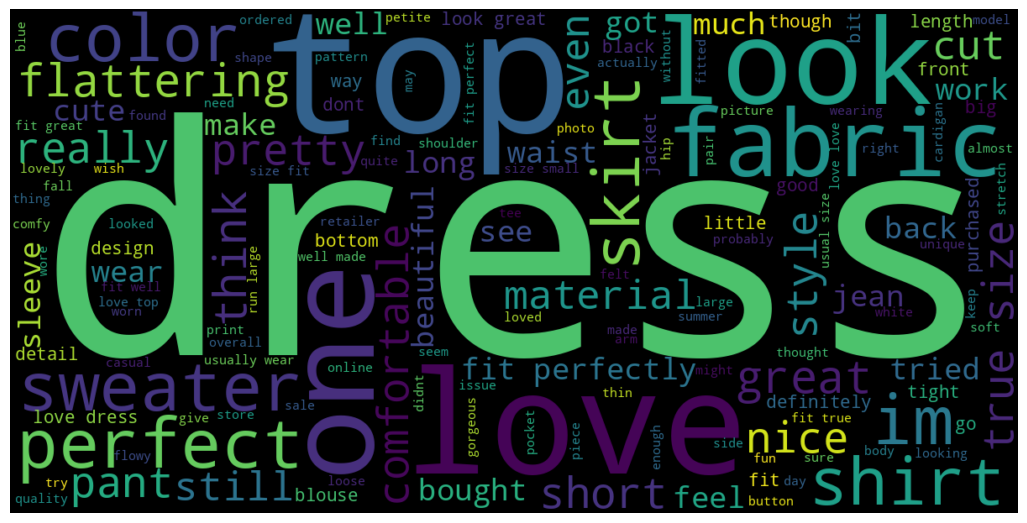

In [80]:
wordcloud_positive.generate(positive_words)

plt.figure(figsize=(13,13))
plt.imshow(wordcloud_positive, interpolation="bilinear")
plt.axis("off")
plt.show()

In [82]:
wordcloud_negative = WordCloud(background_color="black", max_words=200,colormap="gist_heat",scale=3)

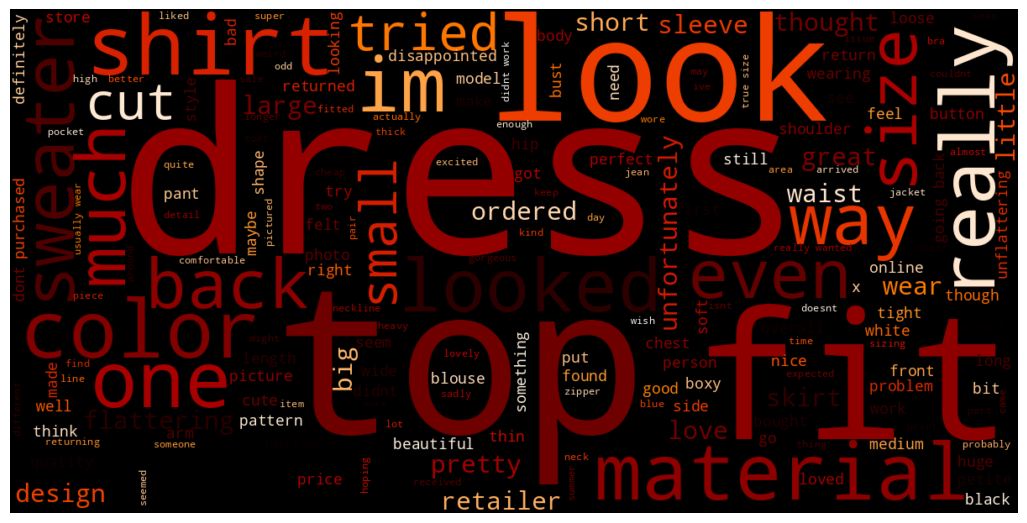

In [83]:
wordcloud_negative.generate(negative_words)

plt.figure(figsize=(13,13))
plt.imshow(wordcloud_negative,
           interpolation="bilinear")
plt.axis("off")
plt.show()

## 5. Sentiment Classification with Machine Learning, Deep Learning and BERT model

Before moving on to modeling, as data preprocessing steps you will need to perform **[vectorization](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)** and **train-test split**. You have performed many times train test split process before.
But you will perform the vectorization for the first time.

Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, you need a way to convert each document into a numeric vector. This process is known as text vectorization. Commonly used vectorization approach that you will use here is to represent each text as a vector of word counts.

At this moment, you have your review text column as a token (which has no punctuations and stopwords). You can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. You can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.

Train all models using TFIDF and Count vectorizer data.

**For Deep learning model, use embedding layer for all words.**

**For BERT model, use TF tensor**

After performing data preprocessing, build your models using following classification algorithms:

- Logistic Regression,
- Naive Bayes,
- Support Vector Machine,
- Random Forest,
- Ada Boosting
- Deep Learning Model
- BERT Model

### Train - Test Split

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In [84]:
from sklearn.model_selection import train_test_split

In [88]:
X = df["review"].values
y = df["label"].map({0:1, 1:0}).values # we changed the label 1 to 0, and 0 to 1. We want to focus on negative class.

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

In the next step we create a numerical feature vector for each document:

### Count Vectorization

In [90]:
from sklearn.feature_extraction.text import CountVectorizer

In [91]:
vectorizer = CountVectorizer(preprocessor=cleaning, min_df=3,max_df=0.9)
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [92]:
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [93]:
pd.DataFrame(X_train_count.toarray(), columns = vectorizer.get_feature_names_out())

ab  abby  abdomen  ability  able  abo  absolute  absolutely  abstract  \
0       0     0        0        0     0    0         0           0         0   
1       0     0        0        0     0    0         0           0         0   
2       0     0        0        0     0    0         0           0         0   
3       0     0        0        0     0    0         0           0         0   
4       0     0        0        0     0    0         0           0         0   
...    ..   ...      ...      ...   ...  ...       ...         ...       ...   
18107   0     0        0        0     0    0         0           0         0   
18108   0     0        0        0     0    0         0           0         0   
18109   0     0        0        0     0    0         0           0         0   
18110   0     0        0        0     0    0         0           1         0   
18111   0     0        0        0     0    0         0           0         0   

       absurd  ...  zero  zig  zigzag  zip  zipped  zipper  zippered  zipping  \
0           0  ...     0    0       0    0       0       0         0        0   
1           0  ...     0    0       0    0       0       0         0        0   
2           0  ...     0    0       0    0       0       0         0        0   
3           0  ...     0    0       0    0       0       0         0        0   
4           0  ...     0    0       0    0       0       0         0        0   
...       ...  ...   ...  ...     ...  ...     ...     ...       ...      ...   
18107       0  ...     0    0       0    0       0       0         0        0   
18108       0  ...     0    0       0    0       0       0         0        0   
18109       0  ...     0    0       0    0       0       0         0        0   
18110       0  ...     0    0       0    0       0       0         0        0   
18111       0  ...     0    0       0    0       0       0         0        0   

       zone  zoom  
0         0     0  
1         0     1  
2         0     0  
3         0     0  
4         0     0  
...     ...   ...  
18107     0     0  
18108     0     0  
18109     0     0  
18110     0     0  
18111     0     0  

[18112 rows x 4947 columns]

### TF-IDF

In [94]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [95]:
tf_idf_vectorizer = TfidfVectorizer(preprocessor=cleaning,
                                    min_df=3,
                                    max_df=0.90)
X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

In [96]:
X_train_tf_idf.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.29306073],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [97]:
pd.DataFrame(X_train_tf_idf.toarray(), columns = tf_idf_vectorizer.get_feature_names_out())

ab  abby  abdomen  ability  able  abo  absolute  absolutely  abstract  \
0      0.0   0.0      0.0      0.0   0.0  0.0       0.0    0.000000       0.0   
1      0.0   0.0      0.0      0.0   0.0  0.0       0.0    0.000000       0.0   
2      0.0   0.0      0.0      0.0   0.0  0.0       0.0    0.000000       0.0   
3      0.0   0.0      0.0      0.0   0.0  0.0       0.0    0.000000       0.0   
4      0.0   0.0      0.0      0.0   0.0  0.0       0.0    0.000000       0.0   
...    ...   ...      ...      ...   ...  ...       ...         ...       ...   
18107  0.0   0.0      0.0      0.0   0.0  0.0       0.0    0.000000       0.0   
18108  0.0   0.0      0.0      0.0   0.0  0.0       0.0    0.000000       0.0   
18109  0.0   0.0      0.0      0.0   0.0  0.0       0.0    0.000000       0.0   
18110  0.0   0.0      0.0      0.0   0.0  0.0       0.0    0.324134       0.0   
18111  0.0   0.0      0.0      0.0   0.0  0.0       0.0    0.000000       0.0   

       absurd  ...  zero  zig  zigzag  zip  zipped  zipper  zippered  zipping  \
0         0.0  ...   0.0  0.0     0.0  0.0     0.0     0.0       0.0      0.0   
1         0.0  ...   0.0  0.0     0.0  0.0     0.0     0.0       0.0      0.0   
2         0.0  ...   0.0  0.0     0.0  0.0     0.0     0.0       0.0      0.0   
3         0.0  ...   0.0  0.0     0.0  0.0     0.0     0.0       0.0      0.0   
4         0.0  ...   0.0  0.0     0.0  0.0     0.0     0.0       0.0      0.0   
...       ...  ...   ...  ...     ...  ...     ...     ...       ...      ...   
18107     0.0  ...   0.0  0.0     0.0  0.0     0.0     0.0       0.0      0.0   
18108     0.0  ...   0.0  0.0     0.0  0.0     0.0     0.0       0.0      0.0   
18109     0.0  ...   0.0  0.0     0.0  0.0     0.0     0.0       0.0      0.0   
18110     0.0  ...   0.0  0.0     0.0  0.0     0.0     0.0       0.0      0.0   
18111     0.0  ...   0.0  0.0     0.0  0.0     0.0     0.0       0.0      0.0   

       zone      zoom  
0       0.0  0.000000  
1       0.0  0.293061  
2       0.0  0.000000  
3       0.0  0.000000  
4       0.0  0.000000  
...     ...       ...  
18107   0.0  0.000000  
18108   0.0  0.000000  
18109   0.0  0.000000  
18110   0.0  0.000000  
18111   0.0  0.000000  

[18112 rows x 4947 columns]

### Eval Function

In [98]:
from sklearn.metrics import confusion_matrix,classification_report, f1_score, recall_score, accuracy_score, precision_score

In [99]:
def eval(model, X_train, X_test):
  y_pred = model.predict(X_test)
  y_pred_train = model.predict(X_train)
  print(confusion_matrix(y_test, y_pred))
  print("Test_Set")
  print(classification_report(y_test, y_pred))
  print("Train_Set")
  print(classification_report(y_train, y_pred_train))

## Logistic Regression

In [103]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

scoring= ["accuracy", "f1", "recall", "precision"]

### CountVectorizer

In [ ]:
# when we have inbalanced dataset, we can use Precision Recall curve and avarage precision score (AP) which will be more reliable

In [100]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(
    C=0.01,
    max_iter=1000,
    class_weight="balanced",
    random_state=101
    )

In [101]:
log.fit(X_train_count,y_train)

LogisticRegression(C=0.01, class_weight='balanced', max_iter=1000,
                   random_state=101)

In [102]:
print("LOG MODEL")
eval(log, X_train_count, X_test_count)

LOG MODEL
[[3130  578]
 [ 122  698]]
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.84      0.90      3708
           1       0.55      0.85      0.67       820

    accuracy                           0.85      4528
   macro avg       0.75      0.85      0.78      4528
weighted avg       0.89      0.85      0.86      4528

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.86      0.91     14831
           1       0.58      0.88      0.70      3281

    accuracy                           0.86     18112
   macro avg       0.77      0.87      0.80     18112
weighted avg       0.90      0.86      0.87     18112



In [104]:
scores = cross_validate(log,
                        X_train_count,
                        y_train,
                        scoring = scoring,
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores,index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.849216
train_accuracy     0.860541
test_f1            0.671674
train_f1           0.696711
test_recall        0.851574
train_recall       0.884249
test_precision     0.554645
train_precision    0.574805
dtype: float64

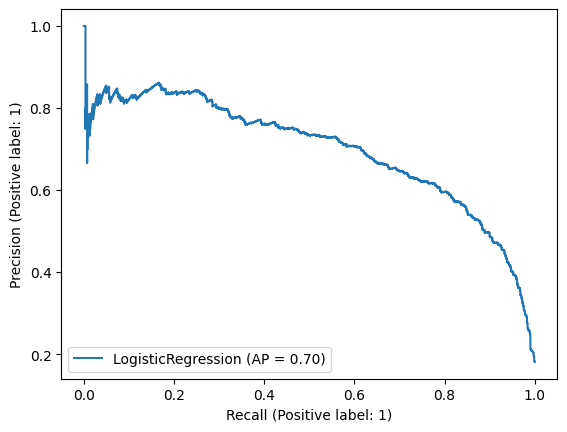

In [105]:
from sklearn.metrics import PrecisionRecallDisplay, average_precision_score

PrecisionRecallDisplay.from_estimator(log, X_test_count, y_test);

In [106]:
y_pred = log.predict(X_test_count)
y_pred_proba= log.predict_proba(X_test_count)[:,1]

log_AP_count = average_precision_score(y_test, y_pred_proba)
log_count_rec = recall_score(y_test, y_pred)
log_count_f1 = f1_score(y_test,y_pred)

In [107]:
log_count_f1

0.666030534351145

### TF-IDF

In [108]:
log = LogisticRegression(
    C=0.06,
    max_iter=1000,
    random_state=101,
    class_weight="balanced"
    )
log.fit(X_train_tf_idf,y_train)

LogisticRegression(C=0.06, class_weight='balanced', max_iter=1000,
                   random_state=101)

In [109]:
print("LOG MODEL")
eval(log, X_train_tf_idf, X_test_tf_idf)

LOG MODEL
[[3107  601]
 [ 118  702]]
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.84      0.90      3708
           1       0.54      0.86      0.66       820

    accuracy                           0.84      4528
   macro avg       0.75      0.85      0.78      4528
weighted avg       0.89      0.84      0.85      4528

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.84      0.90     14831
           1       0.55      0.89      0.68      3281

    accuracy                           0.85     18112
   macro avg       0.76      0.86      0.79     18112
weighted avg       0.90      0.85      0.86     18112



In [110]:
scores = cross_validate(log,
                        X_train_tf_idf,
                        y_train,
                        scoring = scoring,
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.841210
train_accuracy     0.849713
test_f1            0.663301
train_f1           0.681281
test_recall        0.863454
train_recall       0.886688
test_precision     0.538597
train_precision    0.553144
dtype: float64

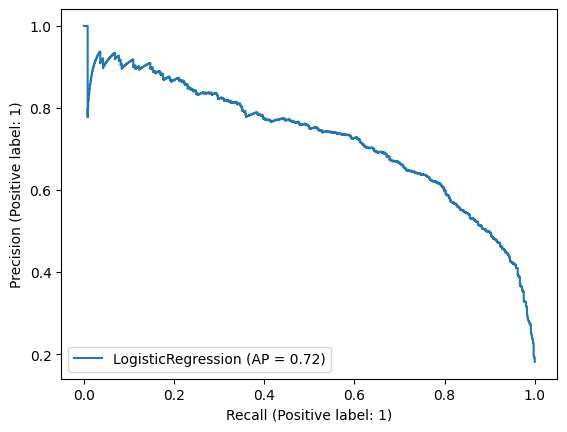

In [111]:
PrecisionRecallDisplay.from_estimator(log, X_test_tf_idf, y_test);

In [112]:
y_pred = log.predict(X_test_tf_idf)
y_pred_proba= log.predict_proba(X_test_tf_idf)[:,1]


log_AP_tfidf = average_precision_score(y_test, y_pred_proba)
log_tfidf_rec = recall_score(y_test, y_pred)
log_tfidf_f1 = f1_score(y_test,y_pred)

In [113]:
log_tfidf_f1

0.6613283089967028

## Naive Bayes

### Countvectorizer

In [114]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
nb = MultinomialNB(alpha=1.5)
nb.fit(X_train_count,y_train)

MultinomialNB(alpha=1.5)

In [115]:
print("NB MODEL")
eval(nb, X_train_count, X_test_count)

NB MODEL
[[3390  318]
 [ 195  625]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      3708
           1       0.66      0.76      0.71       820

    accuracy                           0.89      4528
   macro avg       0.80      0.84      0.82      4528
weighted avg       0.89      0.89      0.89      4528

Train_Set
              precision    recall  f1-score   support

           0       0.96      0.92      0.94     14831
           1       0.70      0.80      0.75      3281

    accuracy                           0.90     18112
   macro avg       0.83      0.86      0.84     18112
weighted avg       0.91      0.90      0.90     18112



In [116]:
scores = cross_validate(
    nb,
    X_train_count,
    y_train,
    scoring = scoring,
    cv = 10,
    return_train_score=True
    )
df_scores = pd.DataFrame(scores,
                         index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.883282
train_accuracy     0.903569
test_f1            0.697676
train_f1           0.750898
test_recall        0.743975
train_recall       0.802330
test_precision     0.657102
train_precision    0.705669
dtype: float64

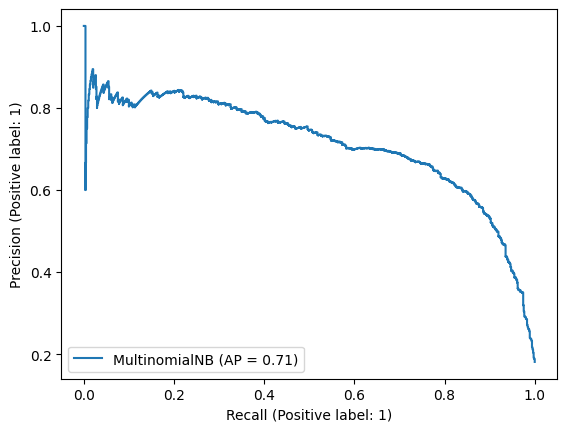

In [117]:
PrecisionRecallDisplay.from_estimator(nb, X_test_count, y_test);

In [118]:
y_pred = nb.predict(X_test_count)
y_pred_proba= nb.predict_proba(X_test_count)[:,1]

nb_AP_count = average_precision_score(y_test, y_pred_proba)
nb_count_rec = recall_score(y_test, y_pred)
nb_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [ ]:
nb = BernoulliNB(alpha=0.7)
nb.fit(X_train_tf_idf,y_train)

In [121]:
print("NB MODEL")
eval(nb, X_train_tf_idf, X_test_tf_idf)

NB MODEL
[[3654   54]
 [ 549  271]]
Test_Set
              precision    recall  f1-score   support

           0       0.87      0.99      0.92      3708
           1       0.83      0.33      0.47       820

    accuracy                           0.87      4528
   macro avg       0.85      0.66      0.70      4528
weighted avg       0.86      0.87      0.84      4528

Train_Set
              precision    recall  f1-score   support

           0       0.89      0.99      0.93     14831
           1       0.90      0.42      0.57      3281

    accuracy                           0.89     18112
   macro avg       0.89      0.70      0.75     18112
weighted avg       0.89      0.89      0.87     18112



In [122]:
scores = cross_validate(
    nb,
    X_train_count,
    y_train,
    scoring = scoring,
    cv = 10,
    return_train_score=True
    )
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.883282
train_accuracy     0.903569
test_f1            0.697676
train_f1           0.750898
test_recall        0.743975
train_recall       0.802330
test_precision     0.657102
train_precision    0.705669
dtype: float64

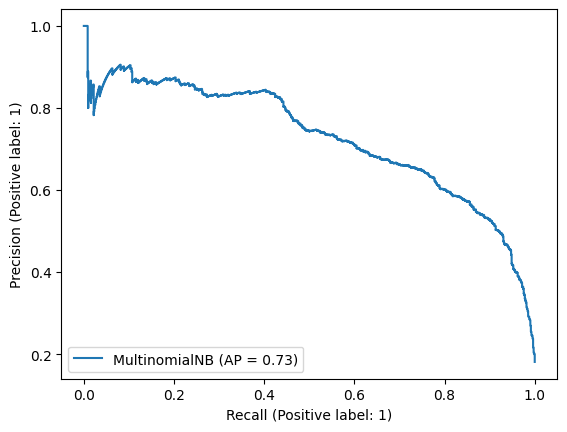

In [123]:
PrecisionRecallDisplay.from_estimator(nb, X_test_tf_idf, y_test);

In [124]:
y_pred = nb.predict(X_test_tf_idf)
y_pred_proba= nb.predict_proba(X_test_tf_idf)[:,1]


nb_AP_tfidf = average_precision_score(y_test, y_pred_proba)
nb_tfidf_rec = recall_score(y_test, y_pred)
nb_tfidf_f1 = f1_score(y_test,y_pred)

## Support Vector Machine (SVM)

### Countvectorizer

In [125]:
from sklearn.svm import LinearSVC

In [126]:
svc = LinearSVC(
    C=0.001,
    class_weight="balanced",
    random_state=101
)
svc.fit(X_train_count, y_train)

LinearSVC(C=0.001, class_weight='balanced', random_state=101)

In [128]:
print("SVC MODEL")
eval(svc, X_train_count, X_test_count)

SVC MODEL
[[3130  578]
 [ 118  702]]
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.84      0.90      3708
           1       0.55      0.86      0.67       820

    accuracy                           0.85      4528
   macro avg       0.76      0.85      0.78      4528
weighted avg       0.89      0.85      0.86      4528

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.86      0.91     14831
           1       0.58      0.88      0.70      3281

    accuracy                           0.86     18112
   macro avg       0.77      0.87      0.80     18112
weighted avg       0.90      0.86      0.87     18112



In [129]:
scores = cross_validate(
    svc,
    X_train_count,
    y_train,
    scoring = scoring,
    cv = 10,
    return_train_score=True
    )
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.848333
train_accuracy     0.860860
test_f1            0.670476
train_f1           0.698130
test_recall        0.851877
train_recall       0.888178
test_precision     0.552907
train_precision    0.575079
dtype: float64

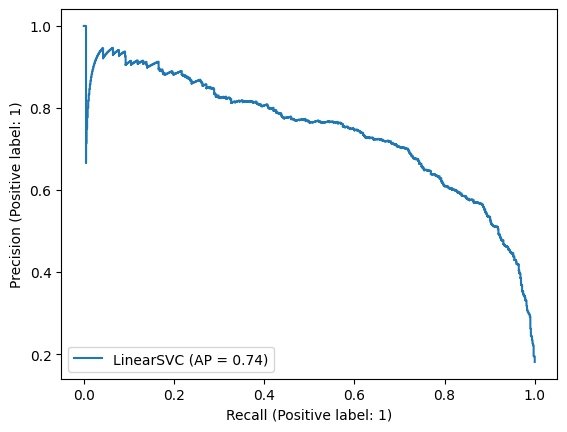

In [130]:
PrecisionRecallDisplay.from_estimator(svc, X_test_tf_idf, y_test);

In [131]:
y_pred = svc.predict(X_test_count)
decision_function= svc.decision_function(X_test_count)

svc_AP_count = average_precision_score(y_test, decision_function)
svc_count_rec = recall_score(y_test, y_pred)
svc_count_f1 = f1_score(y_test,y_pred)

### TD-IDF

In [132]:
svc = LinearSVC(
    C=0.03,
    class_weight="balanced",
    random_state=101
)
svc.fit(X_train_tf_idf, y_train)

LinearSVC(C=0.03, class_weight='balanced', random_state=101)

In [133]:
print("SVC MODEL")
eval(svc, X_train_tf_idf, X_test_tf_idf)

SVC MODEL
[[3171  537]
 [ 101  719]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.86      0.91      3708
           1       0.57      0.88      0.69       820

    accuracy                           0.86      4528
   macro avg       0.77      0.87      0.80      4528
weighted avg       0.90      0.86      0.87      4528

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.87      0.92     14831
           1       0.60      0.91      0.73      3281

    accuracy                           0.87     18112
   macro avg       0.79      0.89      0.82     18112
weighted avg       0.91      0.87      0.88     18112



In [134]:
scores = cross_validate(
    svc,
    X_train_tf_idf,
    y_train,
    scoring = scoring,
    cv = 10,
    return_train_score=True
    )
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.856836
train_accuracy     0.874853
test_f1            0.686432
train_f1           0.726640
test_recall        0.864984
train_recall       0.918182
test_precision     0.569153
train_precision    0.601224
dtype: float64

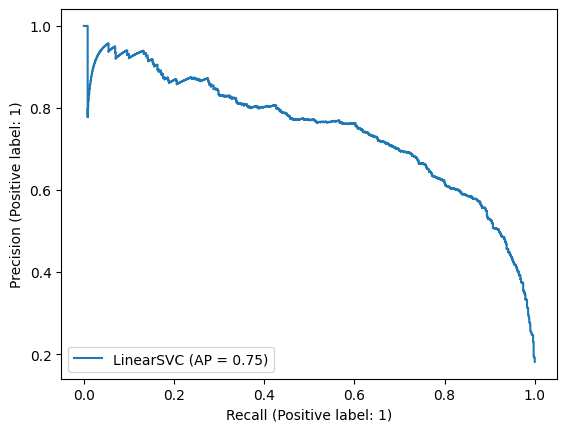

In [135]:
PrecisionRecallDisplay.from_estimator(svc, X_test_tf_idf, y_test);

In [136]:
y_pred = svc.predict(X_test_tf_idf)
decision_function= svc.decision_function(X_test_tf_idf)

svc_AP_tfidf = average_precision_score(y_test, decision_function)
svc_tfidf_rec = recall_score(y_test, y_pred)
svc_tfidf_f1 = f1_score(y_test,y_pred)

## Random Forest

### Countvectorizer

In [145]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(100,
                            max_depth = 7,
                            random_state = 101,
                            n_jobs = -1,
                            class_weight="balanced")
rf.fit(X_train_count, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=7, n_jobs=-1,
                       random_state=101)

In [146]:
print("RF MODEL")
eval(rf, X_train_count, X_test_count)

RF MODEL
[[3080  628]
 [ 160  660]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.83      0.89      3708
           1       0.51      0.80      0.63       820

    accuracy                           0.83      4528
   macro avg       0.73      0.82      0.76      4528
weighted avg       0.87      0.83      0.84      4528

Train_Set
              precision    recall  f1-score   support

           0       0.96      0.85      0.90     14831
           1       0.55      0.85      0.67      3281

    accuracy                           0.85     18112
   macro avg       0.76      0.85      0.79     18112
weighted avg       0.89      0.85      0.86     18112



In [147]:
scores = cross_validate(rf,
                        X_train_count,
                        y_train,
                        scoring = scoring,
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores,
                         index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.831770
train_accuracy     0.849504
test_f1            0.632368
train_f1           0.672216
test_recall        0.798535
train_recall       0.851773
test_precision     0.523541
train_precision    0.555240
dtype: float64

In [148]:
y_pred = rf.predict(X_test_count)
y_pred_proba= rf.predict_proba(X_test_count)[:,1]

rf_AP_count = average_precision_score(y_test, y_pred_proba)
rf_count_rec = recall_score(y_test, y_pred)
rf_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [149]:
rf = RandomForestClassifier(100,
                            max_depth = 7,
                            random_state = 101,
                            n_jobs = -1,
                            class_weight="balanced")
rf.fit(X_train_tf_idf, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=7, n_jobs=-1,
                       random_state=101)

In [150]:
print("RF MODEL")
eval(rf, X_train_tf_idf, X_test_tf_idf)

RF MODEL
[[3050  658]
 [ 165  655]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.82      0.88      3708
           1       0.50      0.80      0.61       820

    accuracy                           0.82      4528
   macro avg       0.72      0.81      0.75      4528
weighted avg       0.87      0.82      0.83      4528

Train_Set
              precision    recall  f1-score   support

           0       0.96      0.84      0.90     14831
           1       0.54      0.86      0.66      3281

    accuracy                           0.84     18112
   macro avg       0.75      0.85      0.78     18112
weighted avg       0.89      0.84      0.85     18112



In [151]:
scores = cross_validate(rf,
                        X_train_tf_idf,
                        y_train,
                        scoring = scoring,
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores,
                         index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.825199
train_accuracy     0.852498
test_f1            0.621473
train_f1           0.680932
test_recall        0.792132
train_recall       0.868774
test_precision     0.511431
train_precision    0.559932
dtype: float64

In [152]:
y_pred = rf.predict(X_test_tf_idf)
y_pred_proba= rf.predict_proba(X_test_tf_idf)[:,1]

rf_AP_tfidf = average_precision_score(y_test, y_pred_proba)
rf_tfidf_rec = recall_score(y_test, y_pred)
rf_tfidf_f1 = f1_score(y_test,y_pred)

## Ada Boosting

### Countvectorizer

In [153]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators= 100,
                         random_state = 101)
ada.fit(X_train_count, y_train)

AdaBoostClassifier(n_estimators=100, random_state=101)

In [154]:
print("Ada MODEL")
eval(ada, X_train_count, X_test_count)

Ada MODEL
[[3510  198]
 [ 389  431]]
Test_Set
              precision    recall  f1-score   support

           0       0.90      0.95      0.92      3708
           1       0.69      0.53      0.59       820

    accuracy                           0.87      4528
   macro avg       0.79      0.74      0.76      4528
weighted avg       0.86      0.87      0.86      4528

Train_Set
              precision    recall  f1-score   support

           0       0.90      0.96      0.93     14831
           1       0.72      0.51      0.60      3281

    accuracy                           0.88     18112
   macro avg       0.81      0.73      0.76     18112
weighted avg       0.87      0.88      0.87     18112



In [155]:
scores = cross_validate(ada,
                        X_train_count,
                        y_train,
                        scoring = scoring,
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores,
                         index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.868430
train_accuracy     0.876172
test_f1            0.572665
train_f1           0.601984
test_recall        0.486748
train_recall       0.516950
test_precision     0.695921
train_precision    0.720531
dtype: float64

In [156]:
y_pred = ada.predict(X_test_count)
y_pred_proba= ada.predict_proba(X_test_count)[:,1]

ada_AP_count = average_precision_score(y_test, y_pred_proba)
ada_count_rec = recall_score(y_test, y_pred)
ada_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [157]:
ada = AdaBoostClassifier(n_estimators= 100,
                         random_state = 101,
                         learning_rate=0.7)
ada.fit(X_train_tf_idf, y_train)

AdaBoostClassifier(learning_rate=0.7, n_estimators=100, random_state=101)

In [158]:
print("Ada MODEL")
eval(ada, X_train_tf_idf, X_test_tf_idf)

Ada MODEL
[[3571  137]
 [ 453  367]]
Test_Set
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      3708
           1       0.73      0.45      0.55       820

    accuracy                           0.87      4528
   macro avg       0.81      0.71      0.74      4528
weighted avg       0.86      0.87      0.86      4528

Train_Set
              precision    recall  f1-score   support

           0       0.89      0.97      0.93     14831
           1       0.77      0.46      0.58      3281

    accuracy                           0.88     18112
   macro avg       0.83      0.72      0.75     18112
weighted avg       0.87      0.88      0.86     18112



In [159]:
scores = cross_validate(ada,
                        X_train_tf_idf,
                        y_train,
                        scoring = scoring,
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores,
                         index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.867989
train_accuracy     0.878135
test_f1            0.544932
train_f1           0.582044
test_recall        0.436770
train_recall       0.468455
test_precision     0.725213
train_precision    0.768445
dtype: float64

In [160]:
y_pred = ada.predict(X_test_tf_idf)
y_pred_proba= ada.predict_proba(X_test_tf_idf)[:,1]

ada_AP_tfidf = average_precision_score(y_test, y_pred_proba)
ada_tfidf_rec = recall_score(y_test, y_pred)
ada_tfidf_f1 = f1_score(y_test,y_pred)

## DL modeling

In [161]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

### Tokenization

In [163]:
num_words = 20001
tokenizer = Tokenizer(num_words=num_words)

In [166]:
tokenizer.fit_on_texts(X)

### Creating word index

In [168]:
tokenizer.word_index

{'dress': 1,
 'fit': 2,
 'not': 3,
 'size': 4,
 'love': 5,
 'top': 6,
 'like': 7,
 'color': 8,
 'look': 9,
 'wear': 10,
 'great': 11,
 'im': 12,
 'would': 13,
 'fabric': 14,
 'small': 15,
 'really': 16,
 'ordered': 17,
 'little': 18,
 'perfect': 19,
 'one': 20,
 'flattering': 21,
 'soft': 22,
 'well': 23,
 'back': 24,
 'comfortable': 25,
 'cute': 26,
 'nice': 27,
 'bought': 28,
 'beautiful': 29,
 'bit': 30,
 'material': 31,
 'shirt': 32,
 'large': 33,
 'much': 34,
 'sweater': 35,
 'length': 36,
 'run': 37,
 'jean': 38,
 'also': 39,
 'work': 40,
 'petite': 41,
 'got': 42,
 'long': 43,
 'short': 44,
 'waist': 45,
 'quality': 46,
 'medium': 47,
 'skirt': 48,
 'think': 49,
 'pretty': 50,
 'even': 51,
 'retailer': 52,
 'x': 53,
 'make': 54,
 'feel': 55,
 'tried': 56,
 'pant': 57,
 'store': 58,
 'usually': 59,
 'get': 60,
 'way': 61,
 'sleeve': 62,
 'good': 63,
 'could': 64,
 'big': 65,
 'made': 66,
 'cut': 67,
 'go': 68,
 'dont': 69,
 'didnt': 70,
 'still': 71,
 'style': 72,
 'right': 73,
 

In [169]:
len(tokenizer.word_index)

11998

### Converting tokens to numeric

In [170]:
X_num_tokens = tokenizer.texts_to_sequences(X)

In [ ]:
X_num_tokens

### Maximum number of tokens for all documents¶

### Fixing token counts of all documents (pad_sequences)

### Train Set Split

### Modeling

### Model Evaluation

## BERT Modeling

### Read Data

### Train test split

### Tokenization

### Fixing token counts of all documents

### Transformation Vectors to Matrices

### Transformation Matrix to Tensorflow tensor

### Batch Size

### Creating optimization

### Creating Model with TPU

### Model Fiting

### Model evaluation

### Compare Models F1 Scores, Recall Scores and Average Precision Score

### Conclusion

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___